In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# funções de custo por modal (r$/ton)
def frete_rodo(distancia_km):
    return 0.1715 * distancia_km + 61.98

def frete_ferro(distancia_km):
    return 0.15 * distancia_km

def frete_hidro(distancia_km):
    return 0.09 * distancia_km

# custos fixos (r$/ton)
custo_transbordo = 15
custo_elevacao = 30

# frete marítimo
custo_navio_dia = 150_000
capacidade_navio = 50_000
quant_produzida = float(input("informe a quantidade produzida no ano (ton): "))
custo_navio_dia_ton = custo_navio_dia / capacidade_navio
num_navios = quant_produzida / capacidade_navio

In [3]:
distancias = {
    "confresa_miritituba": 1244,
    "miritituba_barcarena": 1100,
    "miritituba_santarem": 300,
    "confresa_palmeirante": 666,
    "palmeirante_itaqui": 1200,
    "confresa_rondonopolis": 922,
    "rondonopolis_santos": 1600
}

In [4]:
custos_ate_navio = {
    "santarem": (
        frete_rodo(distancias["confresa_miritituba"]) +
        custo_transbordo +
        frete_hidro(distancias["miritituba_santarem"]) +
        custo_elevacao
    ),
    "barcarena": (
        frete_rodo(distancias["confresa_miritituba"]) +
        custo_transbordo +
        frete_hidro(distancias["miritituba_barcarena"]) +
        custo_elevacao
    ),
    "itaqui": (
        frete_rodo(distancias["confresa_palmeirante"]) +
        custo_transbordo +
        frete_ferro(distancias["palmeirante_itaqui"]) +
        custo_elevacao
    ),
    "santos": (
        frete_rodo(distancias["confresa_rondonopolis"]) +
        custo_transbordo +
        frete_ferro(distancias["rondonopolis_santos"]) +
        custo_elevacao
    )
}


In [5]:
df = pd.DataFrame({
    "porto": ["santarem", "barcarena", "itaqui", "santos"],
    "rota": ["arco_norte", "arco_norte", "arco_norte", "sul_sudeste"],
    "custo_ate_navio": [
        custos_ate_navio["santarem"],
        custos_ate_navio["barcarena"],
        custos_ate_navio["itaqui"],
        custos_ate_navio["santos"]
    ],
})


In [6]:
df["dias_china"] = df["rota"].apply(
    lambda r: 45 if r == "arco_norte" else 40
)

In [7]:
# custo marítimo por tonelada (ajustado para 2 navios)
df["custo_maritimo"] = df["dias_china"] * custo_navio_dia_ton * num_navios

# custo total por tonelada
df["custo_total"] = df["custo_ate_navio"] + df["custo_maritimo"]

df

,porto,rota,custo_ate_navio,dias_china,custo_maritimo,custo_total
0,santarem,arco_norte,347.326,45,270.0,617.326
1,barcarena,arco_norte,419.326,45,270.0,689.326
2,itaqui,arco_norte,401.199,45,270.0,671.199
3,santos,sul_sudeste,505.103,40,240.0,745.103


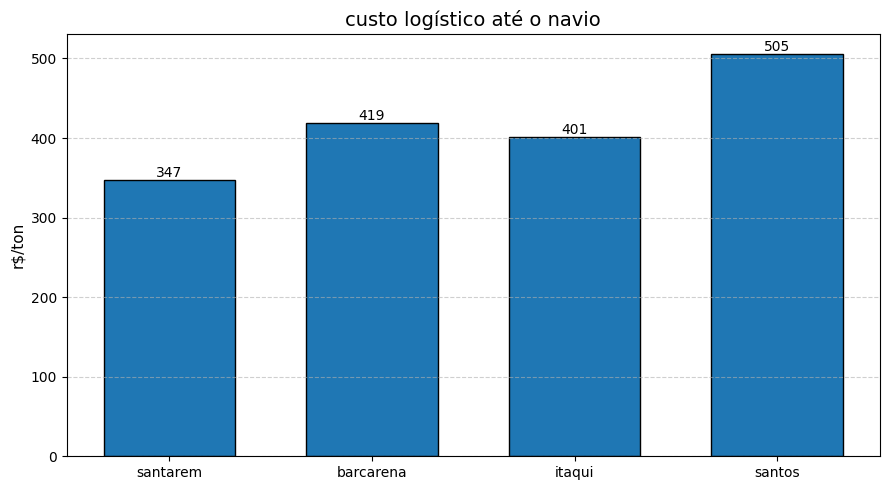

In [8]:
plt.figure(figsize=(9, 5))

barras = plt.bar(df["porto"], df["custo_ate_navio"],edgecolor="black", width=0.65)

plt.title("custo logístico até o navio", fontsize=14)
plt.ylabel("r$/ton", fontsize=11)
plt.grid(axis="y", linestyle="--", alpha=0.6)

for barra in barras:
    altura = barra.get_height()
    plt.text(
        barra.get_x() + barra.get_width() / 2,
        altura,
        f"{altura:.0f}",
        ha="center",
        va="bottom"
    )

plt.tight_layout()
plt.show()


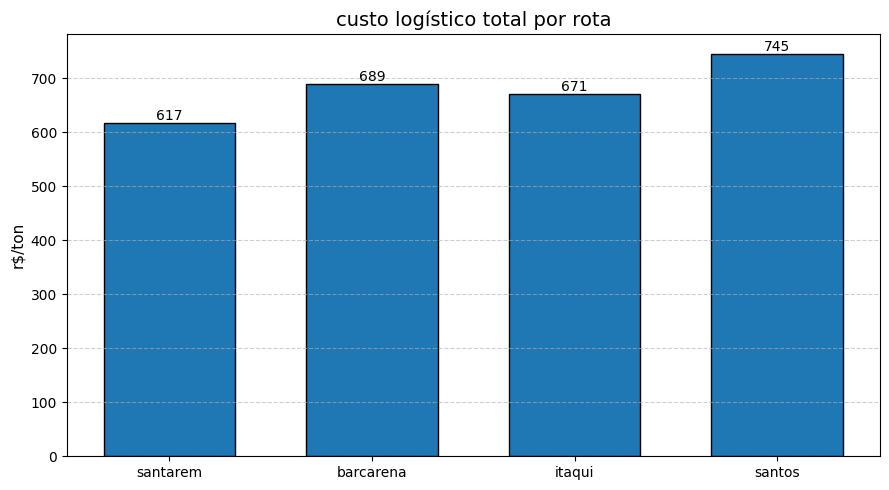

In [9]:
plt.figure(figsize=(9, 5))

barras = plt.bar(df["porto"], df["custo_total"],edgecolor="black", width=0.65)

plt.title("custo logístico total por rota", fontsize=14)
plt.ylabel("r$/ton", fontsize=11)
plt.grid(axis="y", linestyle="--", alpha=0.6)

# rótulos nas barras
for barra in barras:
    altura = barra.get_height()
    plt.text(
        barra.get_x() + barra.get_width() / 2,
        altura,
        f"{altura:.0f}",
        ha="center",
        va="bottom"
    )

plt.tight_layout()
plt.show()
